📊 Nombre d'images par classe :
 - 0 : 4741 images
 - 1 : 3241 images
 - 2 : 3241 images
 - 3 : 3241 images
 - 4 : 4740 images
 - 5 : 4741 images
 - 6 : 4741 images
 - 7 : 4741 images
 - 8 : 4741 images
 - 9 : 4741 images
 - a : 27945 images
 - b : 27821 images
 - c : 27855 images
 - d : 27115 images
 - e : 24227 images
 - f : 27436 images
 - g : 27283 images
 - h : 27370 images
 - i : 28044 images
 - j : 24380 images
 - k : 26966 images
 - l : 27839 images
 - m : 24198 images
 - n : 25264 images
 - o : 28734 images
 - p : 23638 images
 - q : 24879 images
 - r : 25136 images
 - s : 23915 images
 - space : 5886 images
 - t : 24015 images
 - u : 23116 images
 - v : 24898 images
 - w : 23656 images
 - x : 23816 images
 - y : 23656 images
 - z : 20365 images


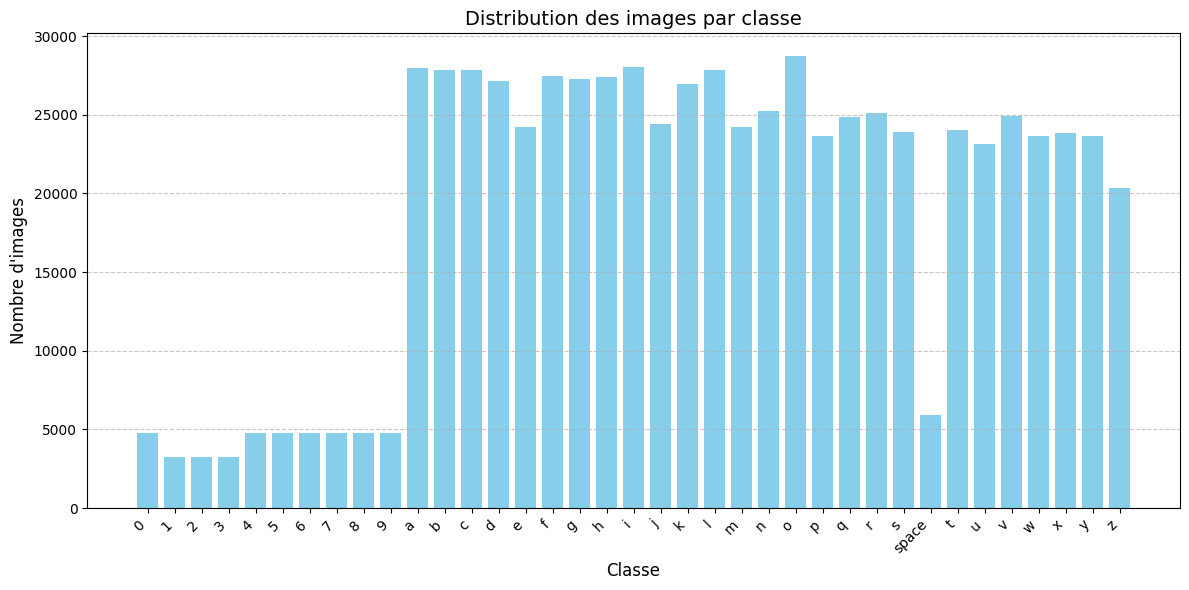

In [2]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# 👉 Remplace par le chemin de ton dossier si besoin
dataset_path = "data_merged"  # Exemple : "C:/Users/Sara/Documents/dataset_merged"

# 🔢 Compter les images dans chaque classe
class_counts = defaultdict(int)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        class_counts[class_name] = len(image_files)

# 🖨️ Affichage dans la console
print("📊 Nombre d'images par classe :")
for class_name, count in class_counts.items():
    print(f" - {class_name} : {count} images")

# 📈 Graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.title("Distribution des images par classe", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🧠 Préparation au Training d’un Modèle avec Données Déséquilibrées

## ✅ Situation actuelle
- 📁 Le dossier `data_preprocessed` est prêt : toutes les images sont redimensionnées, débruitées, égalisées et normalisées.
- 📊 Analyse : les classes sont **déséquilibrées** (certaines comme `z`, `space`, `u` ont beaucoup moins d'exemples que `a`, `o`, etc).
- 💻 Contraintes : je ne peux pas faire d'oversampling ou de data augmentation à cause de limitations en ressources.

---


# exemple for preprocessing for one image

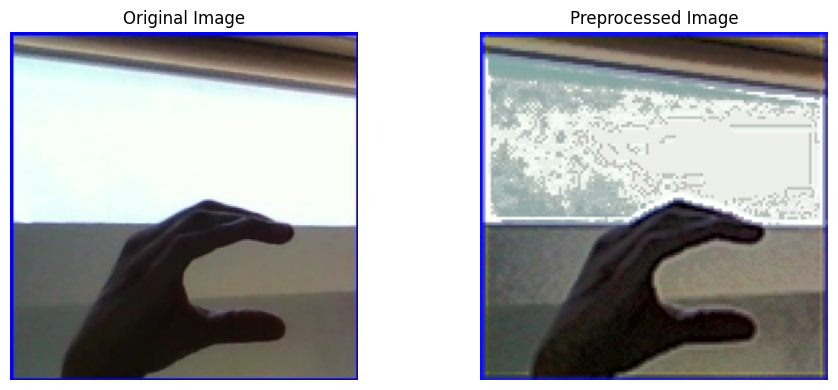

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Path to the dataset
data_path = "data_merged"

# List all folders (0-9 and A-Z)
folders = os.listdir(data_path)
folders = [f for f in folders if os.path.isdir(os.path.join(data_path, f))]

# Choose one random folder
selected_folder = random.choice(folders)
folder_path = os.path.join(data_path, selected_folder)

# List images in that folder
images = os.listdir(folder_path)
images = [img for img in images if img.lower().endswith((".png", ".jpg", ".jpeg"))]

# Pick one image
selected_image = random.choice(images)
image_path = os.path.join(folder_path, selected_image)

# Load in BGR format
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # For display only

# --- Preprocessing steps ---

# 1. Resize to 128x128
resized_image = cv2.resize(image, (128, 128))

# 2. Gaussian Blur (denoise)
denoised_image = cv2.GaussianBlur(resized_image, (3, 3), 0)

# 3. Sharpening
sharpening_kernel = np.array([ 
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharpened_image = cv2.filter2D(denoised_image, -1, sharpening_kernel)

# 4. Histogram Equalization (on Y channel in YCrCb)
ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
equalized_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

# 5. Convert to RGB for display
equalized_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

# 6. Normalize pixel values to [0, 1]
normalized_image = equalized_rgb / 255.0

# --- Display the result ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Preprocessed Image")
plt.imshow(normalized_image)
plt.axis("off")

plt.tight_layout()
plt.show()


# preprocessing for all images

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# --- CONFIGURATION ---
input_dir = "data_merged"
output_dir = "data_preprocessed"
resize_dim = (128, 128)

# Créer le dossier de sortie s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Liste des classes (sous-dossiers)
folders = [f for f in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, f))]

for folder in tqdm(folders, desc="📦 Prétraitement des classes"):
    input_folder_path = os.path.join(input_dir, folder)
    output_folder_path = os.path.join(output_dir, folder)
    os.makedirs(output_folder_path, exist_ok=True)

    images = [img for img in os.listdir(input_folder_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        input_img_path = os.path.join(input_folder_path, img_name)
        output_img_path = os.path.join(output_folder_path, img_name)

        # 🔁 Skip si déjà traité
        if os.path.exists(output_img_path):
            continue

        image = cv2.imread(input_img_path)
        if image is None:
            print(f"⛔ Image illisible : {input_img_path}")
            continue

        try:
            # --- Étape 1 : Resize ---
            resized_image = cv2.resize(image, resize_dim)

            # --- Étape 2 : Denoising ---
            denoised_image = cv2.GaussianBlur(resized_image, (3, 3), 0)

            # --- Étape 3 : Sharpening ---
            sharpening_kernel = np.array([
                [0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]
            ])
            sharpened_image = cv2.filter2D(denoised_image, -1, sharpening_kernel)

            # --- Étape 4 : Histogram Equalization sur YCrCb ---
            ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
            ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
            equalized_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

            # --- Étape 5 : Convertir en RGB ---
            equalized_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

            # --- Étape 6 : Normaliser [0, 1] ---
            normalized_image = equalized_rgb / 255.0

            # --- Sauvegarde (convert back to 0-255 uint8) ---
            output_img_uint8 = (normalized_image * 255).astype(np.uint8)
            cv2.imwrite(output_img_path, cv2.cvtColor(output_img_uint8, cv2.COLOR_RGB2BGR))

        except Exception as e:
            print(f"💥 Erreur sur l'image {input_img_path} : {e}")

print("\n✅ Prétraitement terminé pour toutes les images.")


📦 Prétraitement des classes: 100%|██████████| 37/37 [2:48:54<00:00, 273.92s/it]  



✅ Prétraitement terminé pour toutes les images.


## 🧩 Solution choisie : Weighted Loss
J'ai choisi d'utiliser une **fonction de perte pondérée** (Weighted Cross Entropy Loss) qui attribue un poids plus élevé aux classes minoritaires pour que le modèle les prenne mieux en compte.

### 🎯 Objectif
Éviter que le modèle soit biaisé en faveur des classes les plus fréquentes.

---

## 🪜 Étapes à suivre après le prétraitement


1. **Analyser les effectifs par classe** pour calculer les poids :
   - Calculer la fréquence de chaque classe.
   - Calculer les poids inverses proportionnels à ces fréquences.
   - Exemple : `weight = 1 / (nombre d’images par classe)`

2. **Créer la fonction de perte pondérée** :
   ```python
   criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

3. **Définir le modèle (FastKAN dans mon cas), et entraîner avec le criterion pondéré.** :

4. **Évaluer le modèle avec** :
   - Précision (Precision)
   - Rappel (Recall)
   - F1-score
   - Matrice de confusion

5. **Surveiller les classes minoritaires** :
   - Vérifier si elles sont bien reconnues par le modèle.   

# Étape 1 : Charger le dataset

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# 📁 Dossier après prétraitement
dataset_path = "data_preprocessed"

# 📐 Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize([0.5]*3, [0.5]*3)   # deja normalise dans le preprocessing
])

# 📥 Chargement
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# 🔀 Division train/val
val_percent = 0.1
val_size = int(len(full_dataset) * val_percent)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Étape 2 : Calculer les poids de classes

In [7]:
import torch
from collections import Counter

# 💡 Compter le nombre d’images par classe dans le dataset d'entraînement
targets = [full_dataset.targets[i] for i in train_dataset.indices]
class_counts = Counter(targets)

# 🧮 Total classes
num_classes = len(full_dataset.classes)

# ⚖️ Poids inverses proportionnels
total_samples = sum(class_counts.values())
class_weights = [total_samples / class_counts[i] for i in range(num_classes)]

# 🔢 Convertir en Tensor
class_weights_tensor = torch.FloatTensor(class_weights).to("cuda" if torch.cuda.is_available() else "cpu")


#  Étape 3 : Définir la fonction de perte pondérée

In [8]:
import torch.nn as nn

# 🎯 Fonction de perte avec poids
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)


# Étape 4 : Entraîner le modèle avec la loss pondérée

# Définition du modèle FastKAN

In [16]:
import torch.nn as nn


# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class FastKANLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.linear(x)

class FastKAN(nn.Module):
    def __init__(self, num_classes=36):
        super().__init__()
        self.flatten = nn.Flatten()
        self.kan1 = FastKANLayer(128 * 128 * 3, 256)
        self.kan2 = FastKANLayer(256, 128)
        self.output_layer = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.kan1(x)
        x = self.kan2(x)
        x = self.output_layer(x)
        return x


In [17]:
# 3️⃣ Initialisation
num_classes = len(full_dataset.classes)  # ou remplace par 36 si déjà connu
model = FastKAN(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# 4️⃣ Entraînement
best_val_acc = 0.0
best_model_wts = copy.deepcopy(model.state_dict())

for epoch in range(10):
    model.train()
    total_loss = 0
    correct = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_dataset)

    # 🧪 Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_dataset)

    print(f"✅ Epoch {epoch+1} | Train Loss: {total_loss:.2f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # 💾 Sauvegarde du meilleur modèle
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(model.state_dict(), "best_fastkan_weighted.pth")
        print("📦 Nouveau meilleur modèle sauvegardé !")

    scheduler.step()

Epoch 1: 100%|██████████| 20036/20036 [6:31:11<00:00,  1.17s/it]  


✅ Epoch 1 | Train Loss: 47513.14 | Train Acc: 0.3522 | Val Acc: 0.4140
📦 Nouveau meilleur modèle sauvegardé !


Epoch 2: 100%|██████████| 20036/20036 [2:21:29<00:00,  2.36it/s]  


✅ Epoch 2 | Train Loss: 36257.03 | Train Acc: 0.4850 | Val Acc: 0.4120


Epoch 3: 100%|██████████| 20036/20036 [1:55:11<00:00,  2.90it/s]  


✅ Epoch 3 | Train Loss: 32982.40 | Train Acc: 0.5344 | Val Acc: 0.4905
📦 Nouveau meilleur modèle sauvegardé !


Epoch 4: 100%|██████████| 20036/20036 [1:47:25<00:00,  3.11it/s]  


✅ Epoch 4 | Train Loss: 30955.12 | Train Acc: 0.5656 | Val Acc: 0.4951
📦 Nouveau meilleur modèle sauvegardé !


Epoch 5: 100%|██████████| 20036/20036 [2:06:13<00:00,  2.65it/s]  


✅ Epoch 5 | Train Loss: 29441.12 | Train Acc: 0.5896 | Val Acc: 0.4904


Epoch 6: 100%|██████████| 20036/20036 [2:28:13<00:00,  2.25it/s]  


✅ Epoch 6 | Train Loss: 22181.32 | Train Acc: 0.6847 | Val Acc: 0.6629
📦 Nouveau meilleur modèle sauvegardé !


Epoch 7: 100%|██████████| 20036/20036 [2:30:09<00:00,  2.22it/s]  


✅ Epoch 7 | Train Loss: 21332.41 | Train Acc: 0.6969 | Val Acc: 0.6825
📦 Nouveau meilleur modèle sauvegardé !


Epoch 8: 100%|██████████| 20036/20036 [1:49:59<00:00,  3.04it/s]  


✅ Epoch 8 | Train Loss: 20713.85 | Train Acc: 0.7061 | Val Acc: 0.6506


Epoch 9: 100%|██████████| 20036/20036 [1:50:06<00:00,  3.03it/s]  


✅ Epoch 9 | Train Loss: 20175.87 | Train Acc: 0.7138 | Val Acc: 0.6928
📦 Nouveau meilleur modèle sauvegardé !


Epoch 10: 100%|██████████| 20036/20036 [2:02:40<00:00,  2.72it/s]   


✅ Epoch 10 | Train Loss: 19714.95 | Train Acc: 0.7205 | Val Acc: 0.7334
📦 Nouveau meilleur modèle sauvegardé !


# Étape 5 : Évaluer le modèle avec de bonnes métriques

📊 Rapport Classification :
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       479
           1       0.97      0.99      0.98       308
           2       0.62      0.93      0.75       319
           3       0.97      0.98      0.97       333
           4       0.96      0.98      0.97       460
           5       0.82      0.72      0.77       478
           6       0.72      0.98      0.83       467
           7       0.99      0.97      0.98       511
           8       0.93      0.99      0.96       487
           9       1.00      0.99      0.99       483
           a       0.60      0.79      0.68      2746
           b       0.90      0.51      0.65      2733
           c       0.72      0.76      0.74      2852
           d       0.78      0.70      0.74      2677
           e       0.45      0.79      0.57      2413
           f       0.71      0.77      0.74      2725
           g       0.90      0.52      0.66      2718


C:\Users\pc\AppData\Local\Temp\ipykernel_13616\1978997150.py:41: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


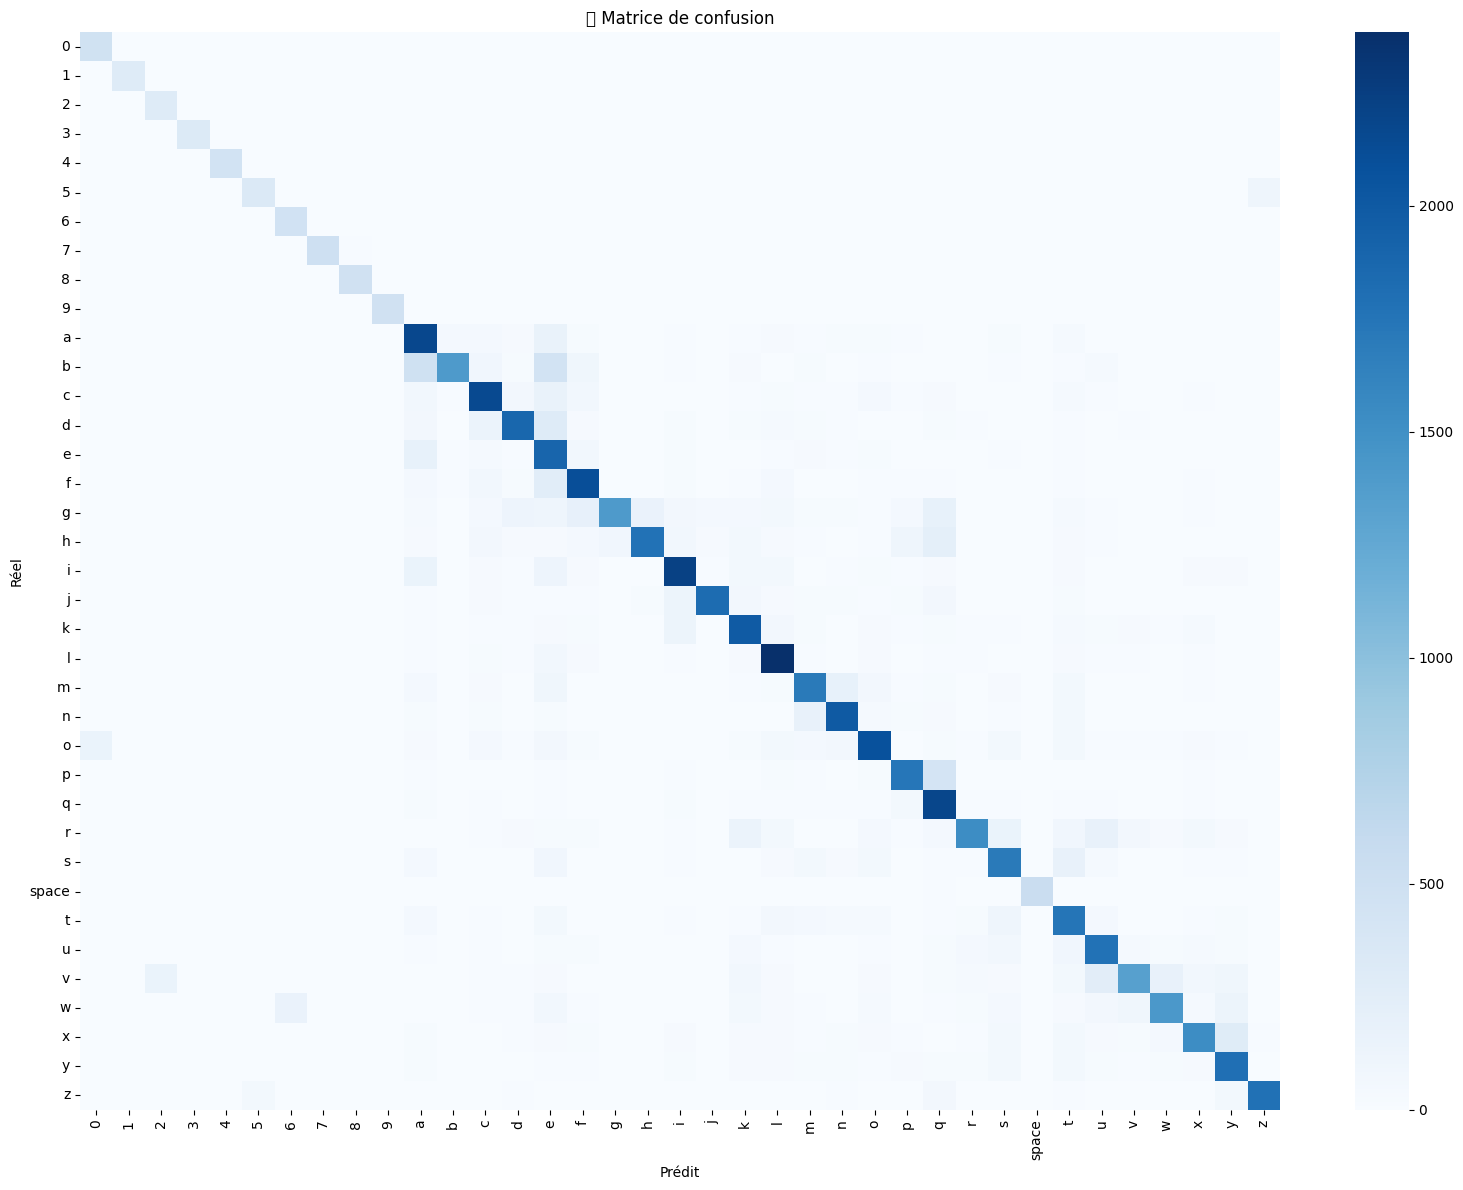

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# 1️⃣ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 2️⃣ Prédictions
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 3️⃣ Rapport complet
print("📊 Rapport Classification :")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

# 4️⃣ Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=False, cmap='Blues',
            xticklabels=full_dataset.classes,
            yticklabels=full_dataset.classes)
plt.title("📌 Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 🧾 Évaluation du modèle

## 📌 1. Précision globale

- **Accuracy (Exactitude)** : `0.73`  
  Cela signifie que **73%** des prédictions sur les données de validation sont correctes.

---

## 📊 2. Analyse par classe (exemples)

| Classe | Précision | Rappel | F1-score | Interprétation |
|--------|-----------|--------|----------|----------------|
| `0`    | 0.75      | 0.99   | 0.85     | Le modèle reconnaît très bien cette classe (peu d'erreurs). |
| `2`    | 0.62      | 0.93   | 0.75     | Beaucoup de vrais positifs, mais quelques erreurs de fausse prédiction. |
| `5`    | 0.82      | 0.72   | 0.77     | Bonne précision mais le rappel est plus faible. |
| `a`    | 0.60      | 0.79   | 0.68     | Le modèle est bon pour reconnaître `a`, mais il fait aussi des erreurs avec d'autres classes. |
| `e`    | 0.45      | 0.79   | 0.57     | Faible précision → souvent confondue avec d’autres lettres. |
| `l`    | 0.73      | 0.86   | 0.79     | Bonne performance globale sur cette classe. |

---

## 📈 3. Moyennes

- **Macro average F1-score** : `0.78`  
  Moyenne des scores F1 par classe (également pondérée). Le modèle est **globalement cohérent**, mais certaines classes sont meilleures que d'autres.

- **Weighted average F1-score** : `0.73`  
  Prend en compte le **nombre d’exemples par classe**. Cela reflète **les déséquilibres** dans les données.

---

## 🧩 4. Matrice de confusion

- Chaque ligne correspond à la **classe réelle**.
- Chaque colonne correspond à la **classe prédite**.
- Une diagonale forte (foncée) = beaucoup de bonnes prédictions.
- Les confusions se trouvent hors diagonale → certaines classes comme `e`, `g`, ou `h` sont **plus confondues**.

---

## 📌 5. Conclusion

- Le modèle donne de **bons résultats globaux (73%)**, surtout sur les chiffres (`0`–`9`) et certaines lettres (`j`, `l`, `d`...).
- **Améliorations possibles** :
  - Mieux gérer les **classes déséquilibrées** (comme `e`, `g`, `a`, `z`).
  - Ajouter de la **data augmentation** ciblée pour les classes confondues.


# Étape 6: Test du modèle avec la caméra


Après avoir entraîné et évalué notre modèle, la dernière étape consiste à tester son comportement sur des données en temps réel. Ce test permet de simuler une application pratique où une caméra capture un geste ou une lettre de la langue des signes, et le modèle prédit la classe correspondante.

Appuie sur [espace] pour capturer, [q] pour quitter
✅ Classe prédite : p


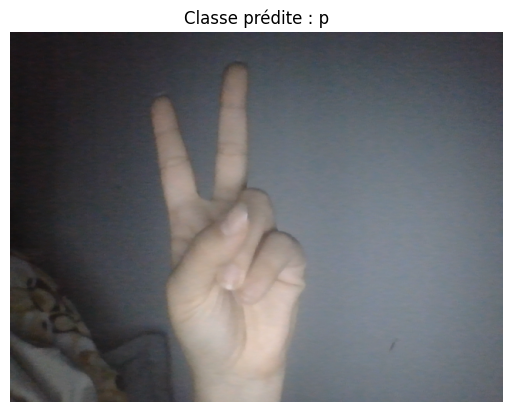

✅ Classe prédite : p


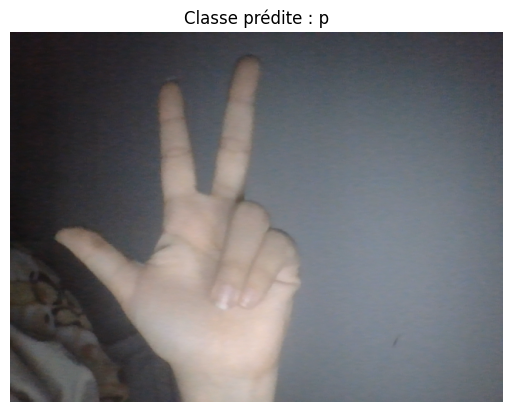

✅ Classe prédite : c


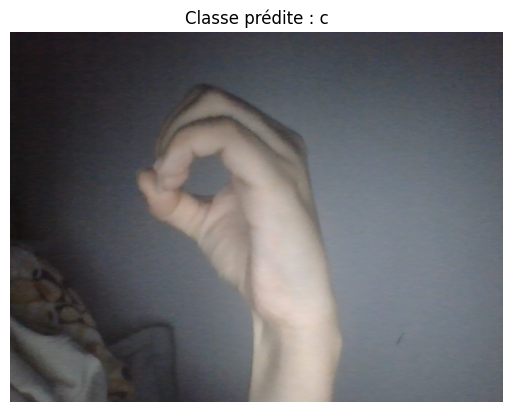

In [28]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ✅ Charger le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 37  # Ajuste selon ton cas
model = FastKAN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("best_fastkan_weighted.pth", map_location=device))
model.eval()

# ✅ Les classes
class_names = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j",
    "k", "l", "m", "n", "o", "p", "q", "r",
    "s", "space", "t", "u", "v", "w", "x", "y", "z"
]

# ✅ Fonction de prétraitement
def preprocess(image):
    image = cv2.resize(image, (128, 128))
    image = cv2.GaussianBlur(image, (3, 3), 0)
    sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, sharpening_kernel)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    image = image / 255.0
    image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
    return image.to(device)

# ✅ Webcam
cap = cv2.VideoCapture(0)
print("Appuie sur [espace] pour capturer, [q] pour quitter")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Live Feed", frame)
    key = cv2.waitKey(1)

    if key == ord(" "):  # Capture
        input_tensor = preprocess(frame)
        with torch.no_grad():
            output = model(input_tensor)
            pred_idx = torch.argmax(output, dim=1).item()
            pred_class = class_names[pred_idx]
            print(f"✅ Classe prédite : {pred_class}")

            # Afficher l'image + prédiction
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Classe prédite : {pred_class}")
            plt.axis("off")
            plt.show()

    elif key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [26]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms

# 🔁 Même prétraitement que dans le dataset
def preprocess_frame(frame):
    # Resize
    resized = cv2.resize(frame, (128, 128))
    # Blur
    blurred = cv2.GaussianBlur(resized, (3, 3), 0)
    # Sharpen
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, kernel)
    # Histogram Equalization (YCrCb)
    ycrcb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    equalized = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    # To tensor
    tensor = transforms.ToTensor()(equalized)
    # Normalize (attention à ce que tu as utilisé à l'entraînement)
    normalized = transforms.Normalize([0.5]*3, [0.5]*3)(tensor)
    return normalized.unsqueeze(0)  # Add batch dimension

# 🧠 Charger le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 37
class_names = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j",
    "k", "l", "m", "n", "o", "p", "q", "r", "s", "t",
    "u", "v", "w", "x", "y", "z", "space"
]

model = FastKAN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("best_fastkan_weighted.pth", map_location=device))
model.eval()

# 🎥 Caméra
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Prétraitement
    input_tensor = preprocess_frame(frame).to(device)

    # 🔮 Prédiction
    with torch.no_grad():
        output = model(input_tensor)
        pred_class = class_names[output.argmax(1).item()]

    # 🖼️ Affichage
    cv2.putText(frame, f"Prediction: {pred_class}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Live Prediction", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [29]:
import cv2
import torch
import numpy as np
from collections import Counter
from torchvision import transforms

# 🔁 Même prétraitement qu’à l’entraînement
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 📥 Charger le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 37  # ⚠️ adapte selon ton entraînement
model = FastKAN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("best_fastkan_weighted.pth", map_location=device))
model.eval()

# 📌 Classes (change selon ton dataset)
classes = sorted(os.listdir("data_preprocessed"))

# 🎥 Webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("❌ Webcam not found.")
    exit()

print("🎬 Appuie sur 'q' pour quitter.")

frames_to_collect = 10
collected_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame")
        break

    # 📐 Extraire ROI (région centrale carrée)
    h, w, _ = frame.shape
    min_dim = min(h, w)
    cx, cy = w // 2, h // 2
    half = min_dim // 2
    roi = frame[cy - half:cy + half, cx - half:cx + half]

    # 🔁 Prétraitement
    img = cv2.GaussianBlur(roi, (3, 3), 0)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    img = cv2.filter2D(img, -1, kernel)

    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    img = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    input_tensor = preprocess(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = torch.argmax(output, dim=1).item()
        collected_frames.append(pred)

    # 🧠 Si on a 10 frames : vote
    if len(collected_frames) >= frames_to_collect:
        final_pred = Counter(collected_frames).most_common(1)[0][0]
        label = classes[final_pred]
        collected_frames = []  # Reset
    else:
        label = "..."

    # 🎯 Affichage
    cv2.putText(frame, f"Prediction: {label}", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(frame, (cx - half, cy - half), (cx + half, cy + half), (255, 0, 0), 2)
    cv2.imshow("Test Live (FastKAN)", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


🎬 Appuie sur 'q' pour quitter.


# prunning + fully quantization 

Pour un projet TinyML, compresser ton modèle est essentiel pour qu’il puisse être déployé sur des appareils à faible consommation (comme un Arduino, Raspberry Pi, ou microcontrôleur). Il y a deux techniques clés que tu peux combiner :

**✅ 1. Quantization (Quantification)**
    -Elle réduit la taille du modèle en remplaçant les poids 32-bit flottants par des entiers 8-bit (ou d'autres formats).

**✅ 2. Pruning (Élagage)**
    -Elle supprime les connexions ou neurones qui ont peu d'impact sur la prédiction pour alléger le modèle.

In [38]:
import os

def print_model_size(path):
    size_mb = os.path.getsize(path) / 1e6
    print(f"💡 Taille du modèle original : {size_mb:.2f} MB")

print_model_size("best_fastkan_weighted.pth")


💡 Taille du modèle original : 50.49 MB


In [39]:
# pruning 
import torch
import torch.nn.utils.prune as prune

# Supposons que ton modèle est déjà défini et entraîné
model = FastKAN(num_classes=37)
model.load_state_dict(torch.load("best_fastkan_weighted.pth"))
model.eval()

# On applique un pruning sur les couches linéaires (tu peux l’adapter à FastKAN)
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        prune.l1_unstructured(module, name='weight', amount=0.4)  # Élaguer 40% des poids

# Retirer les masques de pruning pour rendre le modèle "propre"
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        prune.remove(module, 'weight')


In [40]:
# quantization
# Passer le modèle en mode évaluation
model.eval()

# Préparer pour la quantization dynamique
quantized_model = torch.quantization.quantize_dynamic(
    model, 
    {torch.nn.Linear},  # Tu peux ajouter plus de types si nécessaires
    dtype=torch.qint8
)

# Sauvegarder le modèle quantifié
torch.save(quantized_model.state_dict(), "fastkan_quantized_pruned.pth")


In [42]:
import os

def print_model_size(path):
    size_mb = os.path.getsize(path) / 1e6
    print(f"💡 Taille du modèle original : {size_mb:.2f} MB")

print_model_size("best_fastkan_weighted.pth")
def print_model_size(path):
    size_mb = os.path.getsize(path) / 1e6
    print(f"📦 Modèle compressé : {size_mb:.2f} MB")

print_model_size("fastkan_quantized_pruned.pth")


💡 Taille du modèle original : 50.49 MB
📦 Modèle compressé : 12.63 MB


In [60]:
import torch
print(torch.__version__)
print(torch.backends.quantized.supported_engines)


2.7.1+cpu
['none', 'onednn', 'x86', 'fbgemm']
